<a href="https://colab.research.google.com/github/Papespitia/123/blob/main/Copia_de_Carbon_China.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importación de librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
import statsmodels.api as sm
from scipy import stats
!pip install skimpy
#Libreria Skimpy permite realizar estadistiscos descriptivos de variables categóricas
from skimpy import skim
import statistics as st
from statistics import mode


OBJETIVO ESPECÍFICO 1. ANÁLISIS ESTADÍSTICO DESCRIPTIVO


In [ ]:
#Carga Data set 3 China
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#DataFrame de China
df_China = pd.read_csv('/content/drive/MyDrive/Datasets/China_Dataset3-C.csv')
df_China

,Province,Captured CO2/Mt,Captured cost/($/t)
0,Anhui,3.6,55.7
1,Anhui,24.2,36.0
2,Anhui,3.9,54.6
3,Anhui,4.3,53.3
4,Anhui,1.8,65.0
...,...,...,...
222,Yunnan,4.3,53.3
223,Yunnan,5.2,51.2
224,Yunnan,2.8,58.7
225,Zhejiang,8.0,46.3


Analisis Exploratorio de Datos (EDA)

In [ ]:
## Descripcion de las variables numéricas
df_China.describe()

,Captured CO2/Mt,Captured cost/($/t)
count,227.000000,227.000000
mean,5.690749,54.897357
std,4.946819,10.671026
min,0.200000,34.700000
25%,2.450000,46.800000
50%,4.000000,54.200000
75%,7.700000,60.750000
max,28.300000,104.200000


In [ ]:
# Libreria Skimpy permite realizar estadistiscos descriptivos de variables categóricas
skim(df_China)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 227    │ │ float64     │ 2     │                                                          │
│ │ Number of columns │ 3      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column                  ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0    ┃ p25   ┃ p50   ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Captured CO2/Mt         │   0 │     0 │  5.691 │  4.947 │   0.2 │  2.45 │     4 │    7.7 │   28.3 │  █▃▁▁  │  │
│ │ Captured cost/($/t)     │   0 │     0 │   54.9 │  10.67 │  34.7 │  46.8 │  54.2 │  60.75 │  104.2 │  ▄█▅▁  │  │
│ └─────────────────────────┴─────┴───────┴────────┴────────┴───────┴───────┴───────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓  │
│ ┃          ┃    ┃      ┃          ┃             ┃       ┃          ┃ chars per   ┃ words per   ┃             ┃  │
│ ┃ column   ┃ NA ┃ NA % ┃ shortest ┃ longest     ┃ min   ┃ max      ┃ row         ┃ row         ┃ total words ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩  │
│ │ Province │  0 │    0 │ Anhui    │ Inner       │ Anhui │ Zhejiang │        6.67 │           1 │         236 │  │
│ │          │    │      │          │ Mongolia    │       │          │             │             │             │  │
│ └──────────┴────┴──────┴──────────┴─────────────┴───────┴──────────┴─────────────┴─────────────┴─────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
df_China.head(5)

,Province,Captured CO2/Mt,Captured cost/($/t)
0,Anhui,3.6,55.7
1,Anhui,24.2,36.0
2,Anhui,3.9,54.6
3,Anhui,4.3,53.3
4,Anhui,1.8,65.0


In [ ]:
df_China.tail(5)

,Province,Captured CO2/Mt,Captured cost/($/t)
222,Yunnan,4.3,53.3
223,Yunnan,5.2,51.2
224,Yunnan,2.8,58.7
225,Zhejiang,8.0,46.3
226,Zhejiang,6.4,48.7


In [ ]:
#Identificación de campos sin datos
df_China["Captured CO2/Mt"].unique()


array([ 3.6, 24.2,  3.9,  4.3,  1.8,  2.9,  1.4,  9. ,  8.6,  3.2,  5.8,
        1.5,  2.3,  2. ,  2.8,  7.3,  5.1,  0.9, 10.6, 16.6,  4.6,  1. ,
        1.6,  4.8,  3.5,  0.5,  0.2,  5.4, 18.8, 11.6, 19.8,  7.9,  8.7,
       14.4,  7.2, 10.1,  9.8,  9.4, 17.3, 10.8,  5.9,  1.7,  3.3,  4.7,
        2.5,  2.6,  3.7,  4. ,  4.9,  5.2, 11.1,  8.2,  7.4,  2.1, 10.3,
        4.4,  3.8,  5.3,  2.7,  1.9,  0.6,  1.3, 20.9,  3. ,  0.7, 12.8,
       15.9, 25.5, 28.3, 13.5,  6.6,  8.1,  4.1,  7.7,  6.1,  4.5, 16.8,
       26.8,  9.3, 11.5, 12.9,  0.8,  6.3,  2.2, 11.4,  2.4, 18.2,  4.2,
        6. ,  6.5,  7.6,  6.2, 11.9,  9.7,  8.5, 10.2,  5.7,  8.4,  1.2,
        8. ,  6.4])

In [ ]:
#Identificación de campos sin datos
df_China["Captured cost/($/t)"].unique()

array([ 55.7,  36. ,  54.6,  53.3,  65. ,  58.5,  68.5,  45. ,  69. ,
        45.6,  57. ,  49.8,  68.4,  61.8,  63.4,  59. ,  47.3,  51.5,
        76.7,  43.4,  39.2,  52.5,  57.2,  74.6,  67. ,  52. ,  61.6,
        74.5,  55.8,  88.9, 104.2,  50.7,  55.6,  38.1,  42.6,  37.7,
        46.4,  45.1,  45.5,  40.5,  47.4,  43.9,  44.2,  44.7,  38.8,
        56.1,  43.2,  49.9,  49.6,  65.7,  56.9,  52.4,  60.7,  59.9,
        55.4,  54.3,  51.7,  55.3,  54.5,  51.1,  43. ,  46.1,  63.7,
        58.8,  47.2,  62.8,  43.8,  53. ,  54.9,  50.9,  59.2,  64.3,
        74.3,  82.7,  70.3,  37.2,  57.9,  82.1,  53.5,  41.6,  39.6,
        35.6,  66.9,  76.9,  65.6,  58.4,  67.6,  34.7,  63.1,  41.1,
        48.4,  43.3,  58.3,  55.5,  46.2,  54.2,  54. ,  59.4,  56. ,
        63.5,  79.8,  46.8,  43.7,  49.4,  46.5,  39.1,  54.4,  53.2,
        63.8,  35.1,  42.7,  41.5,  52.2,  79. ,  58.6,  60. ,  48.9,
        62.2,  60.9,  55.2,  38.4,  62.9,  66.2,  53.7,  49.5,  48.6,
        63.9,  49.7,

In [ ]:
# Identificación de patrones de Captured CO2/Mt
Captura = df_China.groupby("Captured CO2/Mt").size().sort_values(ascending=False)
Captura

,0
Captured CO2/Mt,
2.9,9
4.3,8
3.2,7
4.0,7
2.0,6
...,...
20.9,1
24.2,1
25.5,1


In [ ]:
# Identificación de patrones de Captured cost/($/t)
Costo = df_China.groupby("Captured cost/($/t)").size().sort_values(ascending=False)
Costo

,0
Captured cost/($/t),
53.3,7
62.8,4
58.5,4
57.2,4
50.9,4
...,...
79.8,1
82.1,1
82.7,1


In [ ]:
China_Captura_Costo = df_China.groupby(["Captured CO2/Mt", "Captured cost/($/t)"]).size().sort_values(ascending=False)
China_Captura_Costo

,,0
Captured CO2/Mt,Captured cost/($/t),
4.3,53.3,7
2.9,58.5,4
3.2,57.2,4
2.2,61.9,4
2.1,62.8,4
...,...,...
20.9,37.2,1
24.2,36.0,1
25.5,35.6,1


Text(0.5, 1.0, 'Captured CO2/Mt')

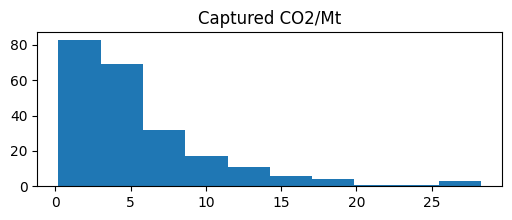

In [ ]:
# Analisis estadistico - Medidas de Tendencia Central
plt.figure(figsize=(6,2))            ## Configuración del tamaño del grafico
plt.hist(df_China["Captured CO2/Mt"])  ## Histograma de Captured CO2/Mt
plt.title("Captured CO2/Mt")

Text(0.5, 1.0, 'Captured cost/($/t)')

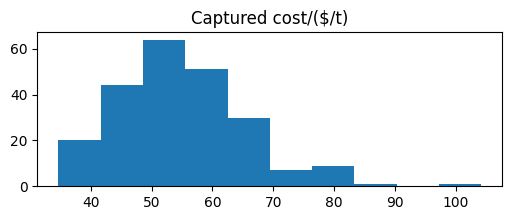

In [ ]:
# Analisis estadistico - Medidas de Tendencia Central
plt.figure(figsize=(6,2))            ## Configuración del tamaño del grafico
plt.hist(df_China["Captured cost/($/t)"])  ## Histograma de Captured CO2/Mt
plt.title("Captured cost/($/t)")

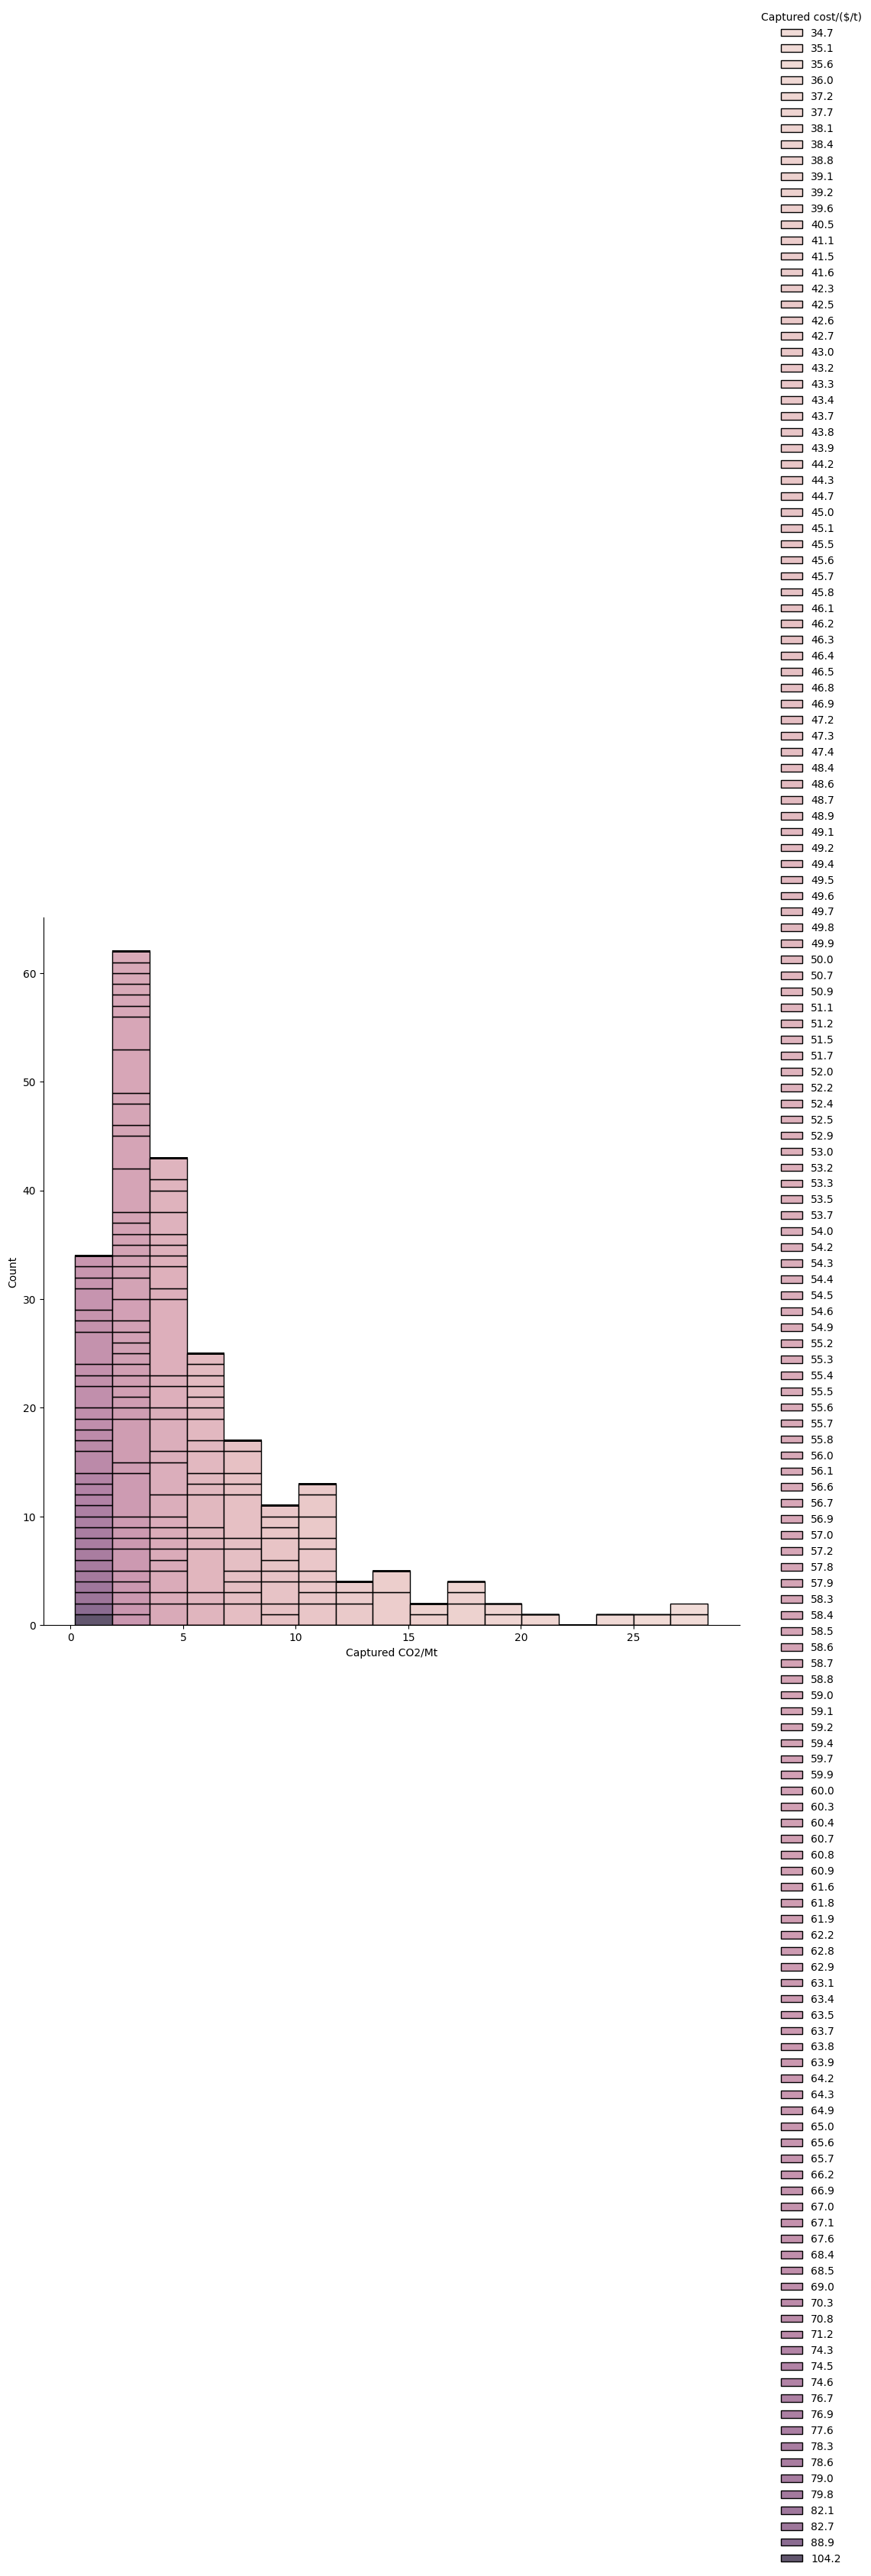

In [ ]:
#Librería Seaborn sns.displot
sns.displot(df_China, x="Captured CO2/Mt", hue="Captured cost/($/t)", multiple="stack", height=10, aspect=1)

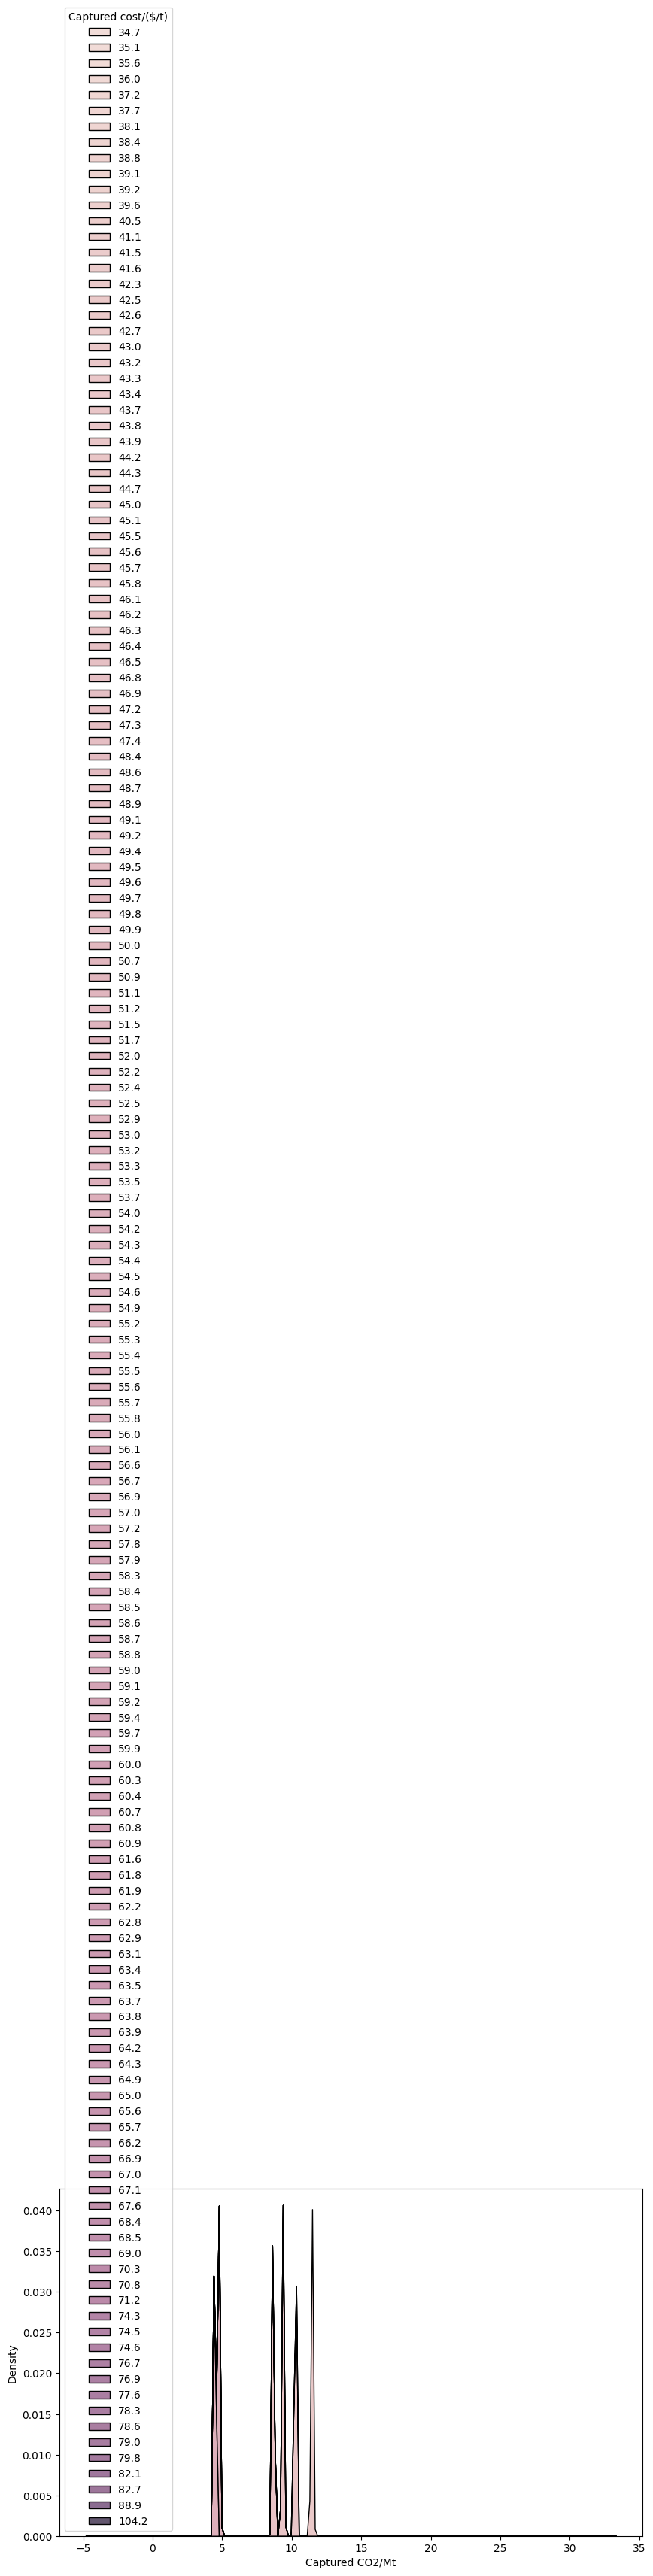

In [ ]:
# Correct approach to set figure size
plt.figure(figsize=(10, 6))  # Adjust figure size before plotting
sns.kdeplot(df_China, x="Captured CO2/Mt", hue="Captured cost/($/t)", multiple="stack")
plt.show()  # Display the plot
#https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn-kdeplot
#A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset,
#analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

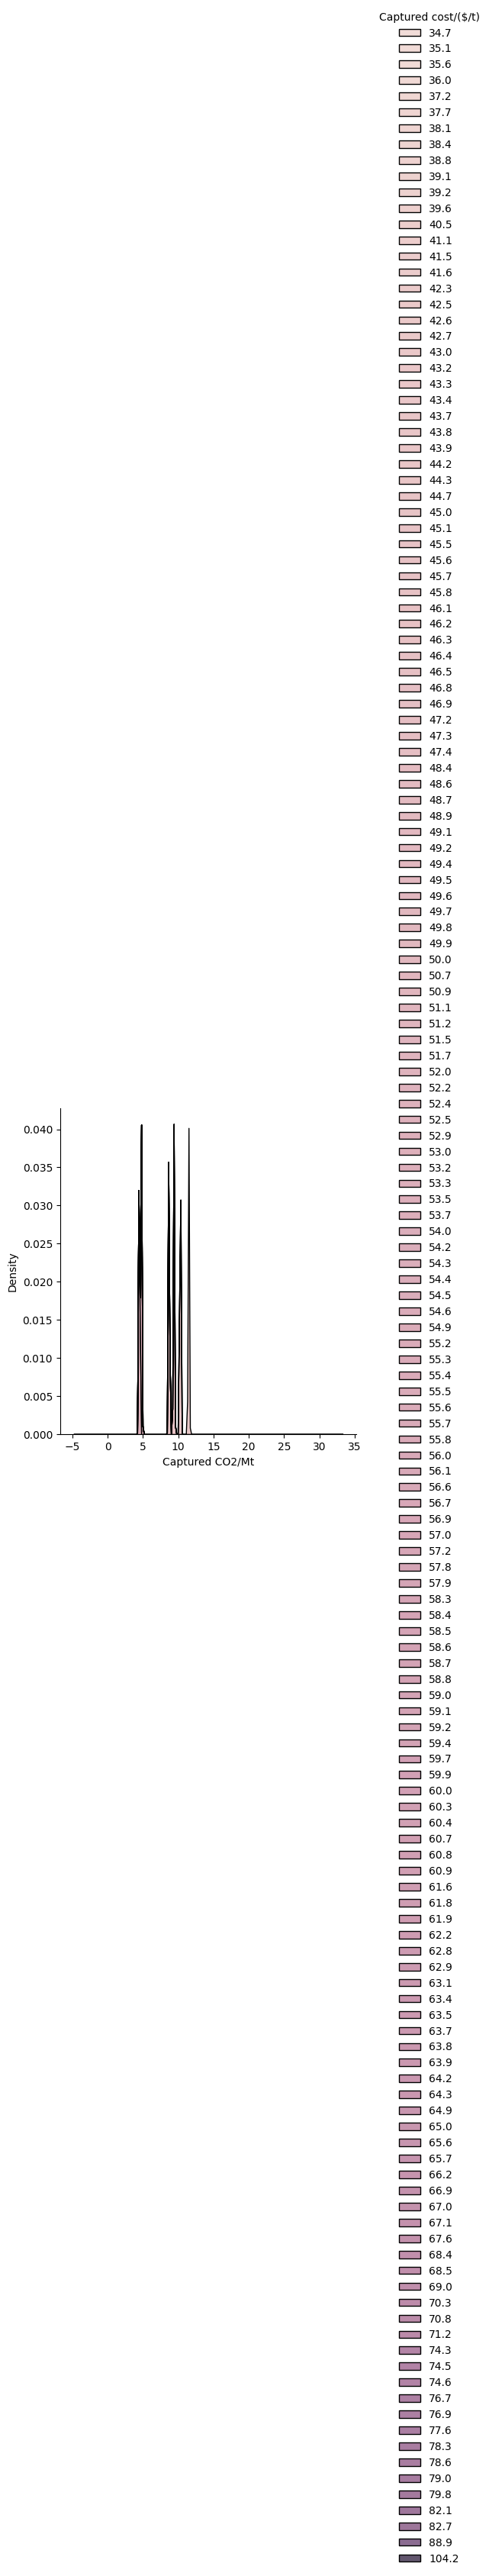

In [ ]:
sns.displot(df_China, x="Captured CO2/Mt", hue="Captured cost/($/t)", kind="kde", multiple="stack")

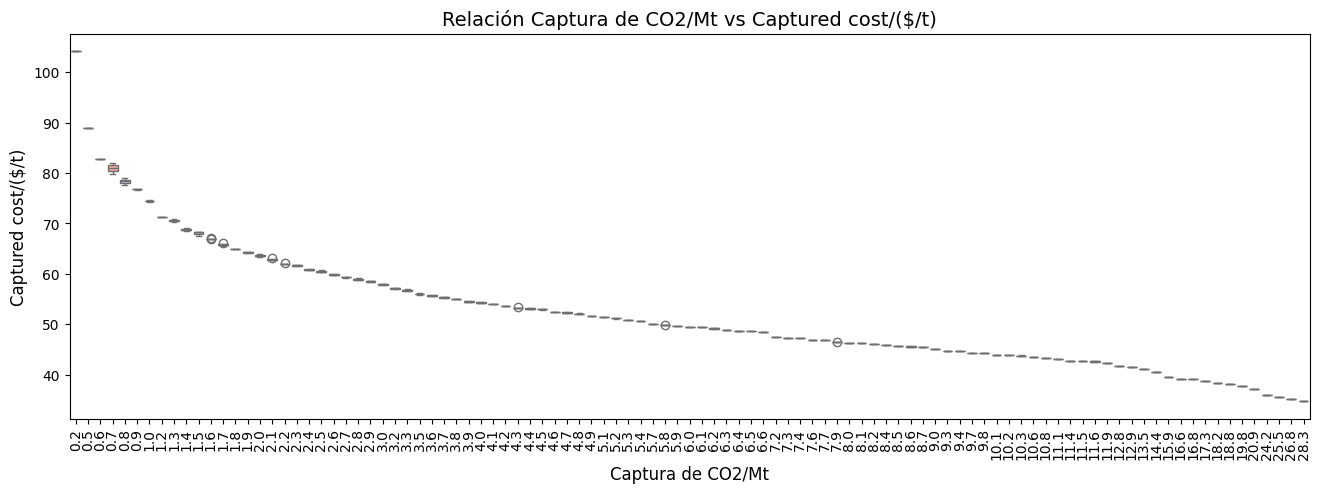

In [ ]:
#Boxplot
plt.figure(figsize=(16,5))
sns.boxplot(x=df_China['Captured CO2/Mt'], y=df_China['Captured cost/($/t)'], palette="pastel")
plt.title('Relación Captura de CO2/Mt vs Captured cost/($/t)', fontsize=14)
plt.xlabel('Captura de CO2/Mt', fontsize=12)
plt.ylabel('Captured cost/($/t)', fontsize=12)
plt.xticks(rotation=90)
plt.show()

OBJETIVO ESPECÍFICO 3

In [ ]:
#MODELO PCA
# Preprocesado y modelado
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_China.head(5)

,Province,Captured CO2/Mt,Captured cost/($/t)
0,Anhui,3.6,55.7
1,Anhui,24.2,36.0
2,Anhui,3.9,54.6
3,Anhui,4.3,53.3
4,Anhui,1.8,65.0


In [ ]:
#Media de la variable "Captured CO2/Mt"
df_China['Captured CO2/Mt'].mean(axis=0)

np.float64(5.690748898678413)

In [ ]:
#Media de cada variable "Captured cost/($/t)"
df_China['Captured cost/($/t)'].mean(axis=0)

np.float64(54.897356828193836)

In [ ]:
#Varianza de la variable "Captured CO2/Mt"
df_China['Captured CO2/Mt'].var(axis=0)

24.471020233129305

In [ ]:
#Varianza de la variable "Captured CO2/Mt"
df_China['Captured cost/($/t)'].var(axis=0)

113.87078944290677

In [ ]:
# Entrenamiento modelo PCA con escalado de los datos
# si las variables tienen distinta dispersión, como en este caso, es necesario escalarlas
numerical_features = ['Captured CO2/Mt', 'Captured cost/($/t)']
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df_China[numerical_features]) # Applying PCA to numerical features only

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [ ]:
# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [ ]:
# Se convierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_, # Pass data as the first positional argument
    columns = df_China[numerical_features].columns, # Access columns from numerical_features
    index   = ['PC1', 'PC2'] # Correct the index to match the number of components
)

,Captured CO2/Mt,Captured cost/($/t)
PC1,0.707107,-0.707107
PC2,0.707107,0.707107


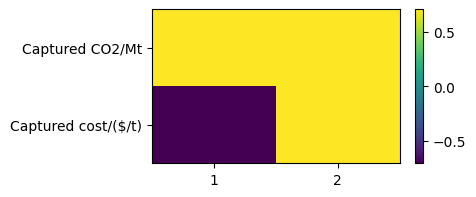

In [ ]:
#Heat Map
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df_China[numerical_features].columns)), df_China[numerical_features].columns)
plt.xticks(range(len(df_China[numerical_features].columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.90552436 0.09447564]


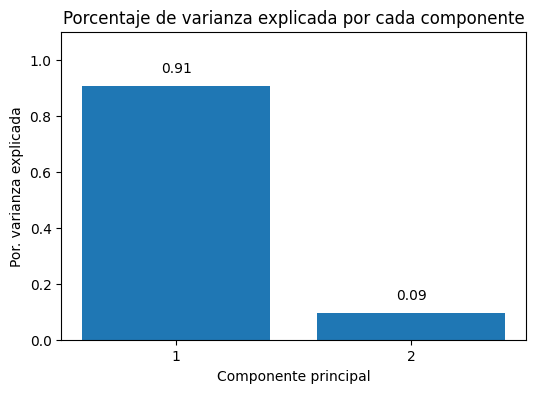

In [ ]:
# Porcentaje de varianza explicada por cada componente
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df_China[numerical_features].columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

 Principal Components Regression PCR

In [ ]:
#Gráficos
style.use('ggplot') or plt.style.use('ggplot')


In [ ]:
#Preprocesado y modelado
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import multiprocessing
# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Correlación entre columnas numéricas
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)

corr_matrix = df_China.select_dtypes(include=['float64', 'int']) \
              .corr(method='pearson')
display(tidy_corr_matrix(corr_matrix).head(5))

,variable_1,variable_2,r,abs_r
1,Captured CO2/Mt,Captured cost/($/t),-0.811049,0.811049
2,Captured cost/($/t),Captured CO2/Mt,-0.811049,0.811049
